In [1]:
import numpy as np

In [2]:
import pandas as pd


In [7]:
mydata=pd.read_csv(r"F:\PhD\Kaggle\train.csv")

In [10]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019308F4D8C8>,
      dtype=object)

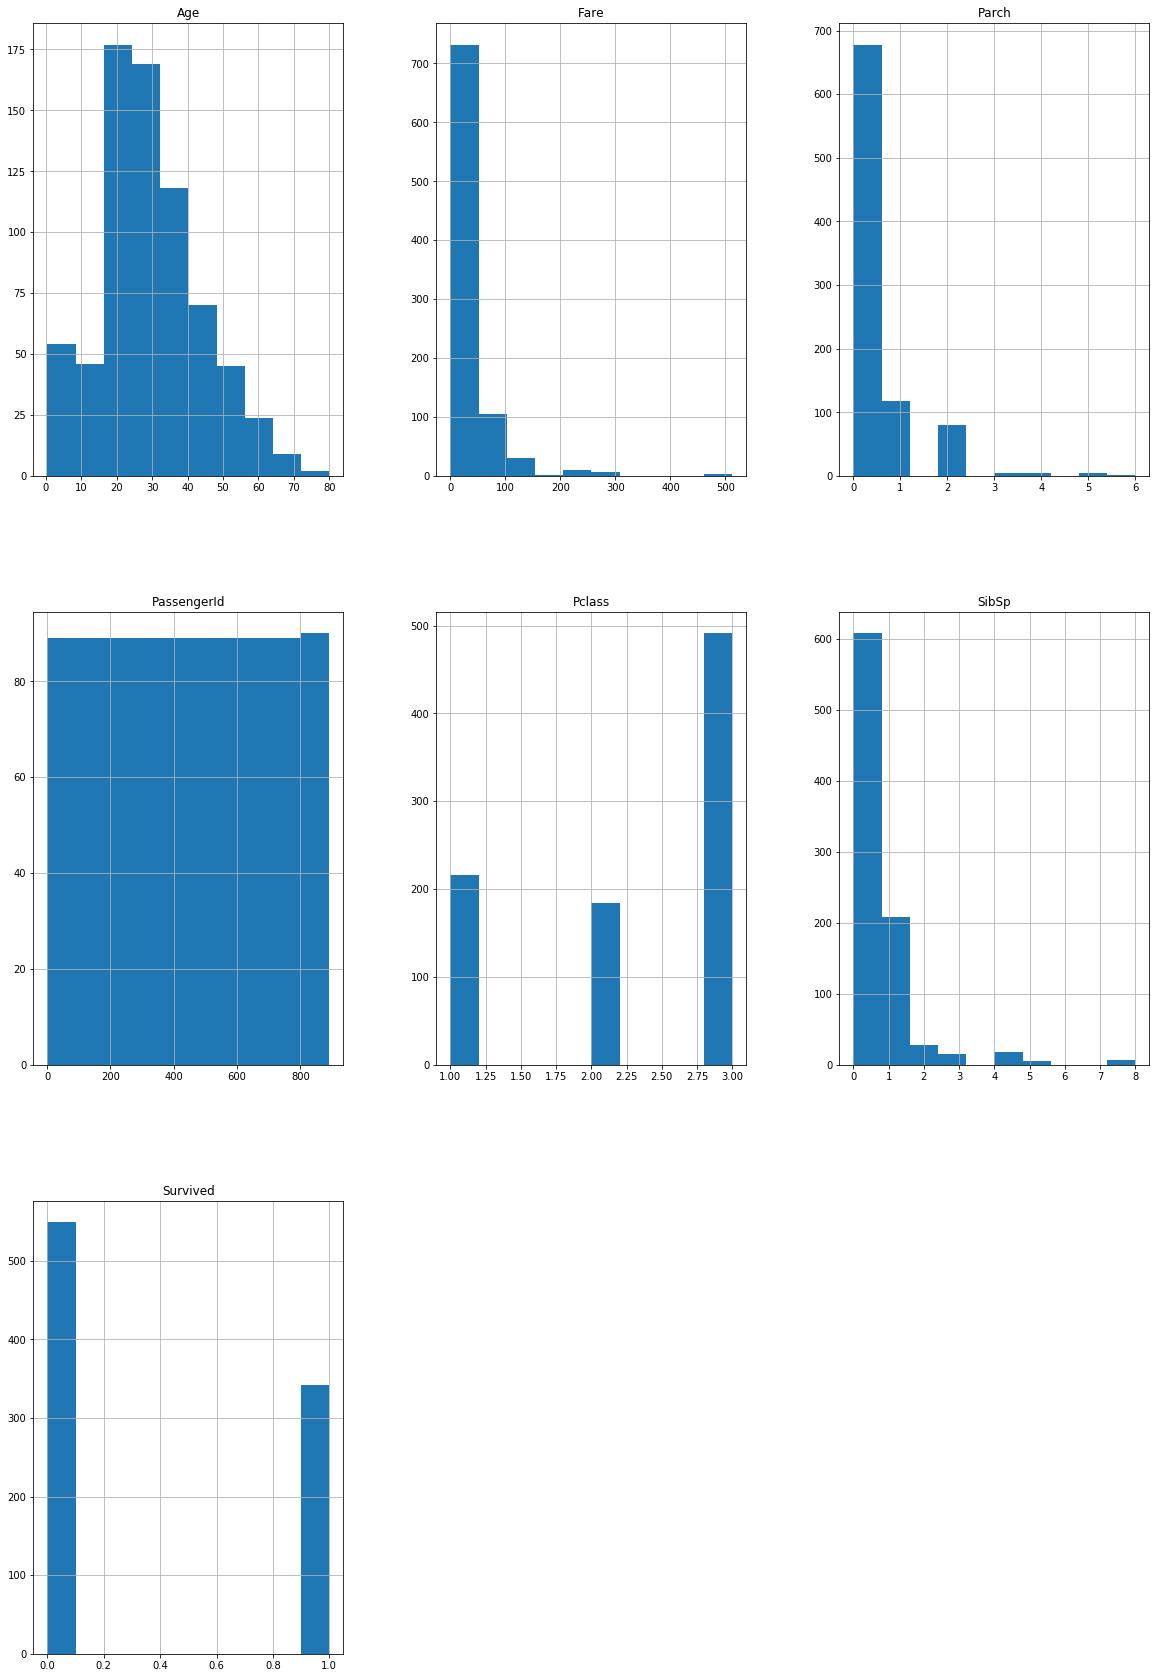

In [14]:
mydata.hist(figsize=[20,30])

In [15]:
import seaborn as sns

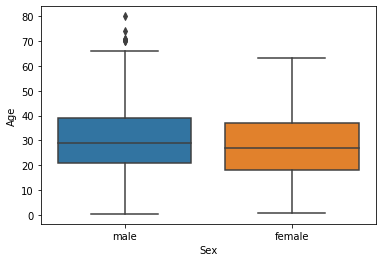

In [22]:
sns.boxplot(x="Sex",y="Age", data=mydata)

In [25]:
pd.crosstab(mydata['Sex'],mydata['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


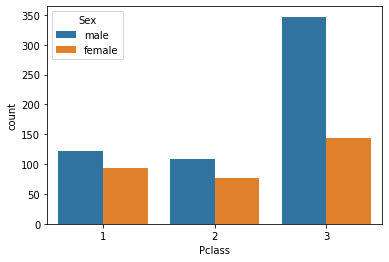

In [30]:
sns.countplot(x="Pclass", hue="Sex", data=mydata)

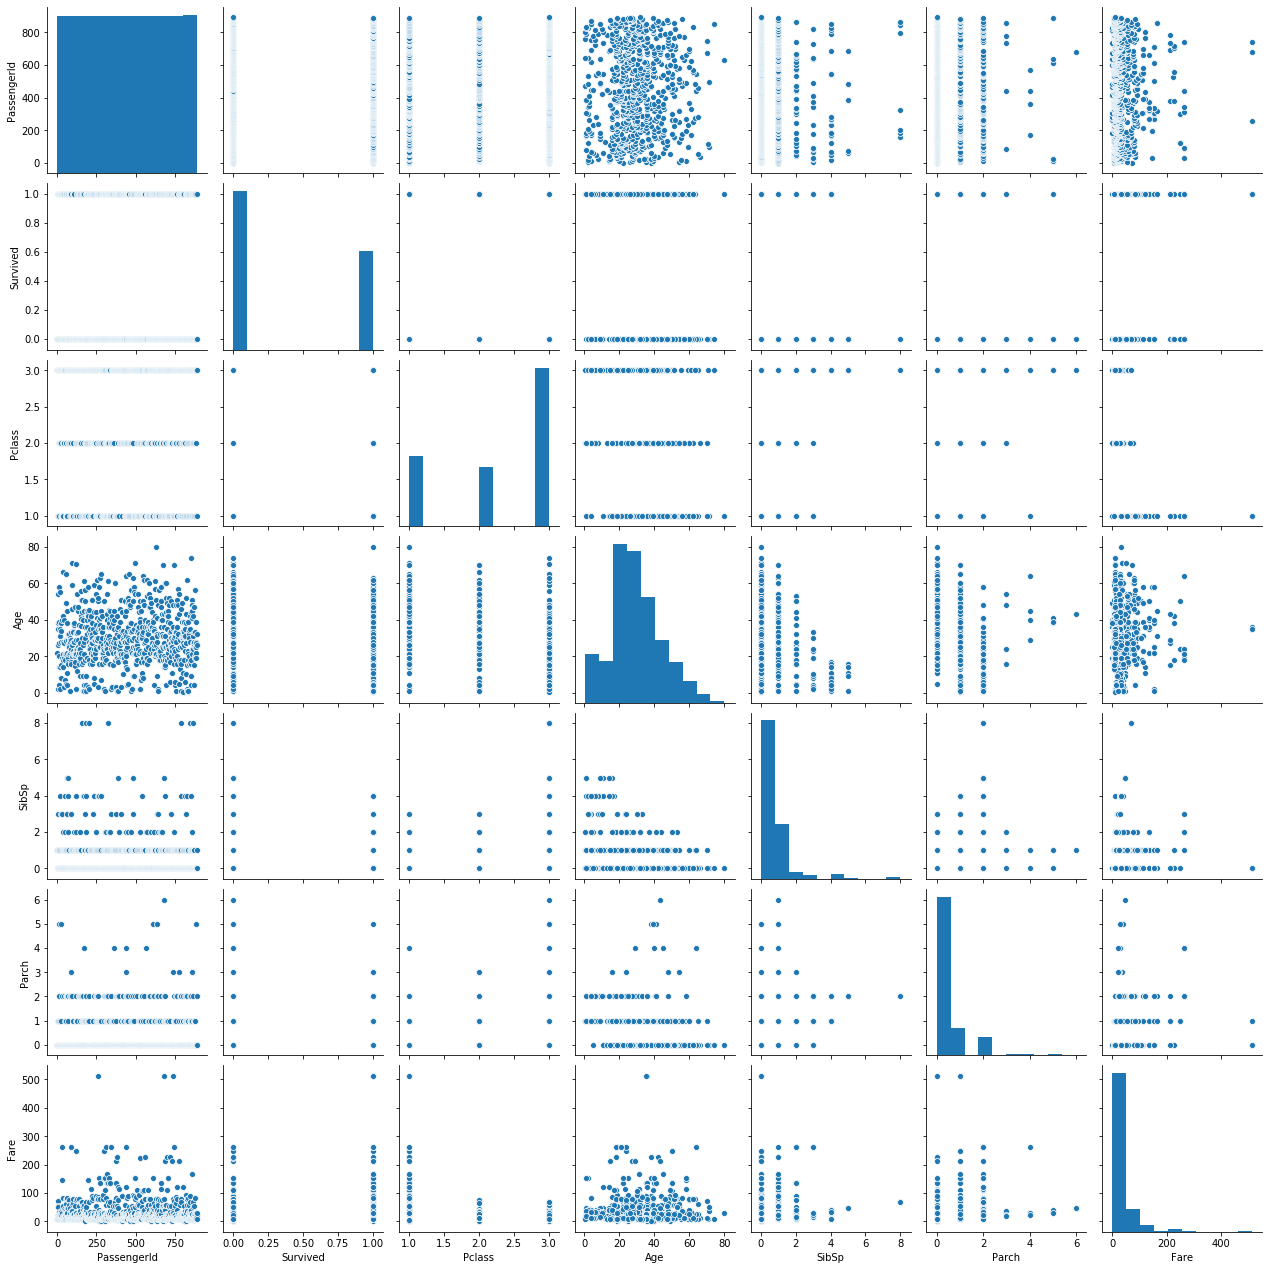

In [31]:
sns.pairplot(mydata)

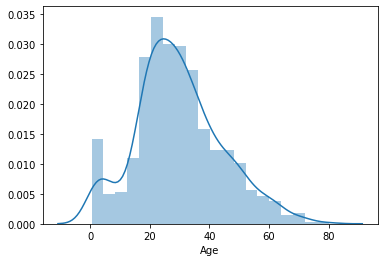

In [43]:
sns.distplot(mydata['Age'])

In [38]:
mydata['Age'].std()

14.526497332334044

In [39]:
mydata['Age'].mean()

29.69911764705882

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019314FB6508>,
      dtype=object)

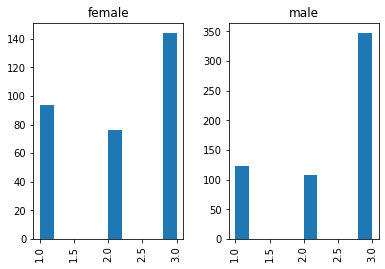

In [40]:
mydata.hist(by='Sex',column='Pclass')

In [44]:
corr=mydata.corr()

In [45]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


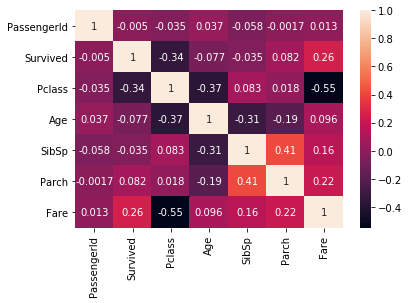

In [46]:
sns.heatmap(corr,annot=True)

In [56]:
#Simple Linear Regression
#Load function from sklearn
from sklearn import linear_model

#Create linear regression object
regr=linear_model.LinearRegression()
y=mydata['Fare']
x=mydata['Age']
#Train the model using the training sets
regr.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[22.   38.   26.   35.   35.     nan 54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.     nan 31.     nan 35.   34.   15.   28.
  8.   38.     nan 19.     nan   nan 40.     nan   nan 66.   28.   42.
   nan 21.   18.   14.   40.   27.     nan  3.   19.     nan   nan   nan
   nan 18.    7.   21.   49.   29.   65.     nan 21.   28.5   5.   11.
 22.   38.   45.    4.     nan   nan 29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.     nan   nan  0.83 30.   22.   29.     nan 28.
 17.   33.   16.     nan 23.   24.   29.   20.   46.   26.   59.     nan
 71.   23.   34.   34.   28.     nan 21.   33.   37.   28.   21.     nan
 38.     nan 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.     nan 32.5  32.5  54.   12.     nan 24.     nan 45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.     nan 22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5    nan 51.
 16.   30.     nan   nan 44.   40.   26.   17.    1.    9.     nan 45.
   nan 28.   61.    4.    1.   21.   56.   18.     nan 50.   30.   36.
   nan   nan  9.    1.    4.     nan   nan 45.   40.   36.   32.   19.
 19.    3.   44.   58.     nan 42.     nan 24.   28.     nan 34.   45.5
 18.    2.   32.   26.   16.   40.   24.   35.   22.   30.     nan 31.
 27.   42.   32.   30.   16.   27.   51.     nan 38.   22.   19.   20.5
 18.     nan 35.   29.   59.    5.   24.     nan 44.    8.   19.   33.
   nan   nan 29.   22.   30.   44.   25.   24.   37.   54.     nan 29.
 62.   30.   41.   29.     nan 30.   35.   50.     nan  3.   52.   40.
   nan 36.   16.   25.   58.   35.     nan 25.   41.   37.     nan 63.
 45.     nan  7.   35.   65.   28.   16.   19.     nan 33.   30.   22.
 42.   22.   26.   19.   36.   24.   24.     nan 23.5   2.     nan 50.
   nan   nan 19.     nan   nan  0.92   nan 17.   30.   30.   24.   18.
 26.   28.   43.   26.   24.   54.   31.   40.   22.   27.   30.   22.
   nan 36.   61.   36.   31.   16.     nan 45.5  38.   16.     nan   nan
 29.   41.   45.   45.    2.   24.   28.   25.   36.   24.   40.     nan
  3.   42.   23.     nan 15.   25.     nan 28.   22.   38.     nan   nan
 40.   29.   45.   35.     nan 30.   60.     nan   nan 24.   25.   18.
 19.   22.    3.     nan 22.   27.   20.   19.   42.    1.   32.   35.
   nan 18.    1.   36.     nan 17.   36.   21.   28.   23.   24.   22.
 31.   46.   23.   28.   39.   26.   21.   28.   20.   34.   51.    3.
 21.     nan   nan   nan 33.     nan 44.     nan 34.   18.   30.   10.
   nan 21.   29.   28.   18.     nan 28.   19.     nan 32.   28.     nan
 42.   17.   50.   14.   21.   24.   64.   31.   45.   20.   25.   28.
   nan  4.   13.   34.    5.   52.   36.     nan 30.   49.     nan 29.
 65.     nan 50.     nan 48.   34.   47.   48.     nan 38.     nan 56.
   nan  0.75   nan 38.   33.   23.   22.     nan 34.   29.   22.    2.
  9.     nan 50.   63.   25.     nan 35.   58.   30.    9.     nan 21.
 55.   71.   21.     nan 54.     nan 25.   24.   17.   21.     nan 37.
 16.   18.   33.     nan 28.   26.   29.     nan 36.   54.   24.   47.
 34.     nan 36.   32.   30.   22.     nan 44.     nan 40.5  50.     nan
 39.   23.    2.     nan 17.     nan 30.    7.   45.   30.     nan 22.
 36.    9.   11.   32.   50.   64.   19.     nan 33.    8.   17.   27.
   nan 22.   22.   62.   48.     nan 39.   36.     nan 40.   28.     nan
   nan 24.   19.   29.     nan 32.   62.   53.   36.     nan 16.   19.
 34.   39.     nan 32.   25.   39.   54.   36.     nan 18.   47.   60.
 22.     nan 35.   52.   47.     nan 37.   36.     nan 49.     nan 49.
 24.     nan   nan 44.   35.   36.   30.   27.   22.   40.   39.     nan
   nan   nan 35.   24.   34.   26.    4.   26.   27.   42.   20.   21.
 21.   61.   57.   21.   26.     nan 80.   51.   32.     nan  9.   28.
 32.   31.   41.     nan 20.   24.    2.     nan  0.75 48.   19.   56.
   nan 23.     nan 18.   21.     nan 18.   24.     nan 32.   23.   58.
 50.   40.   47.   36.   20.   32.   25.     nan 43.     nan 40.   31.
 70.   31.     nan 18.   24.5  18.   43.   36.     nan 27.   20.   14.
 60.   25.   14.   19.   18.   15.   31.    4.     nan 25.   60.   52.
 44.     nan 49.   42.   18.   35.   18.   25.   26.   39.   45.   42.
 22.     nan 24.     nan 48.   29.   52.   19.   38.   27.     nan 33.
  6.   17.   34.   50.   27.   20.   30.     nan 25.   25.   29.   11.
   nan 23.   23.   28.5  48.   35.     nan   nan   nan 36.   21.   24.
 31.   70.   16.   30.   19.   31.    4.    6.   33.   23.   48.    0.67
 28.   18.   34.   33.     nan 41.   20.   36.   16.   51.     nan 30.5
   nan 32.   24.   48.   57.     nan 54.   18.     nan  5.     nan 43.
 13.   17.   29.     nan 25.   25.   18.    8.    1.   46.     nan 16.
   nan   nan 25.   39.   49.   31.   30.   30.   34.   31.   11.    0.42
 27.   31.   39.   18.   39.   33.   26.   39.   35.    6.   30.5    nan
 23.   31.   43.   10.   52.   27.   38.   27.    2.     nan   nan  1.
   nan 62.   15.    0.83   nan 23.   18.   39.   21.     nan 32.     nan
 20.   16.   30.   34.5  17.   42.     nan 35.   28.     nan  4.   74.
  9.   16.   44.   18.   45.   51.   24.     nan 41.   21.   48.     nan
 24.   42.   27.   31.     nan  4.   26.   47.   33.   47.   28.   15.
 20.   19.     nan 56.   25.   33.   22.   28.   25.   39.   27.   19.
   nan 26.   32.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.